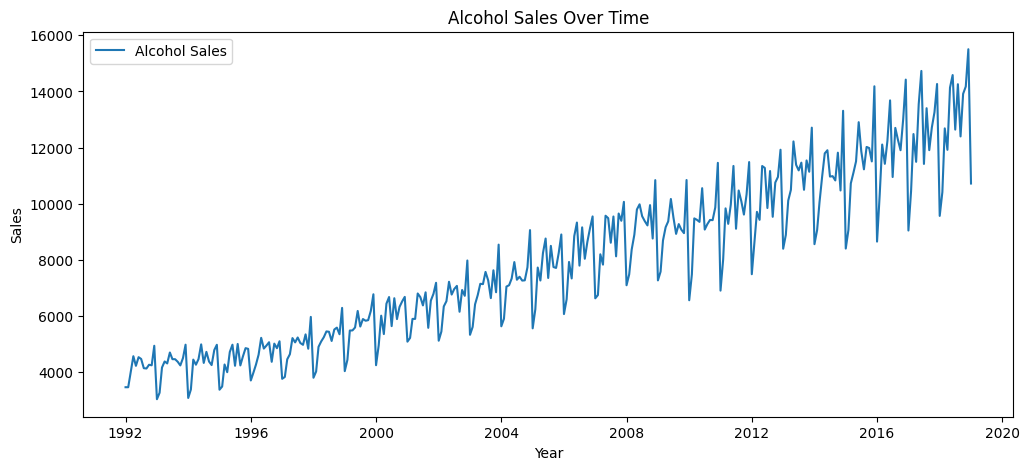

Mean Absolute Error (MAE): 1053.935909816679
Root Mean Squared Error (RMSE): 1355.796573650175

Future Predictions:
2019-02-01    13355.736337
2019-03-01    12865.816793
2019-04-01    13117.071597
2019-05-01    13846.708307
2019-06-01    14104.798198
2019-07-01    12471.954067
2019-08-01    13259.824590
2019-09-01    13055.808057
2019-10-01    13059.767081
2019-11-01    13528.362809
2019-12-01    13577.956013
2020-01-01    13023.169198
Freq: MS, Name: predicted_mean, dtype: float64


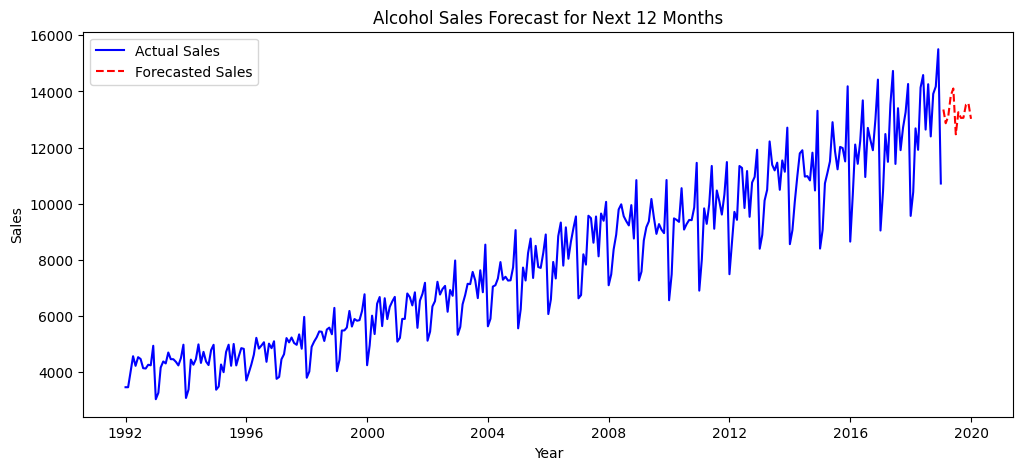

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


file_path = "Alcohol_Sales.csv" 
df = pd.read_csv("Alcohol_Sales.csv")

# Convert the DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])


df.set_index('DATE', inplace=True)
df = df.asfreq('MS') 


plt.figure(figsize=(12,5))
plt.plot(df, label="Alcohol Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Alcohol Sales Over Time")
plt.legend()
plt.show()


model = ARIMA(df, order=(5,1,0))  # (p,d,q) = (5,1,0)
model_fit = model.fit()


forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)


actual_values = df.iloc[-forecast_steps:]


mae = mean_absolute_error(actual_values, forecast[:len(actual_values)])
rmse = np.sqrt(mean_squared_error(actual_values, forecast[:len(actual_values)]))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("\nFuture Predictions:")
print(forecast)


plt.figure(figsize=(12,5))
plt.plot(df, label="Actual Sales", color='blue')
plt.plot(forecast, label="Forecasted Sales", color='red', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Alcohol Sales Forecast for Next 12 Months")
plt.legend()
plt.show()
